## Feature Engineering + Deep Learning 


* This project provides 12 unique types of features.
* Three for each type of engineering. Transforming, Interacting, Mapping, and Extracting.
* The second part of the project is the development of a deep learning classification model to predict the direction of the S&P500 for the dates 2018-01-01—2018-07-12



link to transforming, interacting, mapping, and extracting data:
https://github.com/firmai/deltapy#function-glossary



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

Preparing the Data

In [2]:
# preparing our data
raw_prices = pd.read_csv("https://storage.googleapis.com/sovai-public/random/assetalloc.csv", sep=';', parse_dates=True, index_col='Dates', dayfirst=True)
df = raw_prices.sort_values(by='Dates')
df["target"] = df["SP500"].pct_change().shift(-1)
df["target"] = np.where(df["target"]>0,1,0)
df.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,target
Dates,,,,,,,,,,,,,,,,,,
1989-02-01,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,101.080,101.936,154.38,117.50,1636.57,133.584,286.67,0
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,101.017,101.905,154.94,117.69,1642.94,135.052,287.03,1
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,100.921,101.718,155.69,118.62,1659.11,137.134,285.63,0
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,100.794,101.468,155.58,118.89,1656.86,137.037,284.69,1
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,101.144,102.092,156.84,118.28,1662.76,136.914,284.21,0


### Train Test Split

In [3]:
from sklearn.model_selection import train_test_split
y = df.pop("target")
X = df.copy()

X_train = X[X.index.astype(str)<'2018-01-01']
y_train = y[X_train.index]
X_test = X[~X.index.isin(X_train.index)]
y_test = y[X_test.index]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


### Transforming

1. Refresh your mind on tranformation methods by going back to the material. I am simply providing 1 example here.
1. Don't repeat my logarithmic return calculation, develop your own transformation (there are 1000s of types of transformations).
1. In the example I provide, there is also an error that you have to fix. For example, one of the errors below is that you should actually use `np.log1p()`, but there is another one, so watch out!

In [23]:
# Example Transforming (has errors)

# Name: Logarithmic return of FTSE
# Description: Developing the logarithmic return feature for use within linear models that make normality assumptions.

df["FTSE_log"] = np.log1p(df["FTSE"])
X_train["FTSE_log"] = np.log1p(X_train["FTSE"])
X_test["FTSE_log"] = np.log1p(X_test["FTSE"])

#2 errors
#switch to log1p
#this was not applied to the test and training data sets

In [ ]:
#Transformation #1
#name: robust scaling
#description: applies robust scaling to the datagrams X_train and X_test using the RobustScaler from sklearn.preprocessing.
#it also optionally removes specified columns before scaling.
#he function returns scaled versions of X_train and X_test whilst perserving hte original columns

from sklearn.preprocessing import RobustScaler

def robust_scaler_train_test(X_train, X_test, drop=None):
    #if the drop parameter is provided
    if drop:
        #drop specified columns from both X_train and X_test, ignoring errors if columns don't exist
        X_train = X_train.drop(columns=drop, errors='ignore')
        X_test = X_test.drop(columns=drop, errors='ignore')

    #create an instance of the RobustScaler class
    scaler = RobustScaler()

    #fit and transform X_train using the scaler
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

    #transform X_test using the same scaler
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = robust_scaler_train_test(X_train, X_test, drop=["SP500"])

print("scaled training data")
print(X_train_scaled.head())
print("testing data")
print(X_test_scaled.head())

scaled training data
                FTSE  EuroStoxx50      Gold  French-2Y  French-5Y  French-10Y  \
Dates                                                                           
1989-02-01 -1.304536    -1.045362 -0.004703  -0.996534  -1.003688   -1.063727   
1989-02-02 -1.303037    -1.043929 -0.005330  -1.026741  -1.000707   -1.072705   
1989-02-03 -1.292298    -1.040629 -0.009406  -1.025256  -1.005103   -1.076766   
1989-02-06 -1.302672    -1.039861 -0.010346  -1.095081  -1.024214   -1.096156   
1989-02-07 -1.291123    -1.040778 -0.004389  -1.102674  -1.031476   -1.102812   

            French-30Y     US-2Y     US-5Y    US-10Y    US-30Y  Russel2000  \
Dates                                                                        
1989-02-01   -0.876461 -0.784155 -0.696678 -0.785473 -1.017177   -0.769823   
1989-02-02   -0.880927 -0.786072 -0.697760 -0.788052 -1.018306   -0.768592   
1989-02-03   -0.888380 -0.797699 -0.706558 -0.791983 -1.025119   -0.766943   
1989-02-06   -0.90924

In [25]:
## Transforming 2 (Add code below)
#name:standardScalerTrainTest
#description: applies standard scaling to the training and testing sets to normalize the features and ensure they have a mean of 0 and a standard deviation of 1

from sklearn.preprocessing import StandardScaler

def standard_scaler_train_test(X_train, X_test, drop=None):
    if drop:
        print(f"dropping columns: {drop}")
        X_train = X_train.drop(columns=drop, errors='ignore')
        X_test = X_test.drop(columns=drop, errors='ignore')

    #fits the scaler on the training data
    scaler = StandardScaler()

    #transforms the training data using the scaler & creates a new dataframe
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

    print("scaled training data")
    print(X_train_scaled.head())
    print("testing data")
    print(X_test_scaled.head())

    return X_train_scaled, X_test_scaled

X_train_scaled_std, X_test_scaled_std = standard_scaler_train_test(X_train, X_test, drop=["FTSE"])



dropping columns: ['FTSE']
scaled training data
            EuroStoxx50     SP500      Gold  French-2Y  French-5Y  French-10Y  \
Dates                                                                           
1989-02-01    -1.626507 -1.502403 -0.652760  -1.155383  -1.458372   -1.220832   
1989-02-02    -1.624130 -1.502854 -0.653865  -1.197575  -1.454028   -1.230114   
1989-02-03    -1.618657 -1.502620 -0.661046  -1.195500  -1.460433   -1.234313   
1989-02-06    -1.617382 -1.504298 -0.662703  -1.293025  -1.488283   -1.254361   
1989-02-07    -1.618902 -1.497821 -0.652208  -1.303631  -1.498866   -1.261243   

            French-30Y     US-2Y     US-5Y    US-10Y  ...  FTSE_Small_vol  \
Dates                                                 ...                   
1989-02-01   -1.170096 -1.759750 -1.533393 -1.442323  ...             NaN   
1989-02-02   -1.175405 -1.763514 -1.535250 -1.446125  ...             NaN   
1989-02-03   -1.184264 -1.786339 -1.550342 -1.451918  ...             NaN   

# standardscaler and robustscale are very similar, but there key differences in transforming data are:  

1. standardscaler scales data using the mean and standard deciation
2. robustscaler scales the data based on the median and interquartile range


for this data set, robustscaler is probably the m and better scaling method since we have outliers as it is less sensitive to them

In [ ]:
## Transforming 3 (Add code below)
# Name: Square Values
# Description: applies a square operation to specified columns in the df
def squareValues(df, columns, operation_func):
    if columns:
        for column in columns:
            #checks if the column is present
            if column in df.columns:
                #applies the operation
                df[column] = operation(df[column])
            else:
                print("column not found")

    print("after squaring the dataframe:")
    print(df.head())

    return df

def operation(column):
    return column ** 2
df_out_operations = squareValues(df.copy(), columns=["FTSE"], operation_func=squareValues)


after squaring the dataframe:
                  FTSE  EuroStoxx50   SP500    Gold  French-2Y  French-5Y  \
Dates                                                                       
1989-02-01  4160376.09       875.47  297.09  392.50     99.081     99.039   
1989-02-02  4175483.56       878.08  296.84  392.00     98.898     99.117   
1989-02-03  4284486.01       884.09  296.97  388.75     98.907     99.002   
1989-02-06  4179162.49       885.49  296.04  388.00     98.484     98.502   
1989-02-07  4296499.84       883.82  299.63  392.75     98.438     98.312   

            French-10Y  French-30Y    US-2Y    US-5Y   US-10Y   US-30Y  \
Dates                                                                    
1989-02-01      99.572     100.000  100.031  100.345  101.080  101.936   
1989-02-02      99.278      99.692  100.000  100.314  101.017  101.905   
1989-02-03      99.145      99.178   99.812  100.062  100.921  101.718   
1989-02-06      98.510      97.739   99.812  100.062  100.79

### Interacting

There are millions of possible interaction methods, be creative and come up with your own. For this assignment there is no 'right' feature engineering method, you simply develop one, and give it a name and a discreption.

In [ ]:
# Example Interacting (has errors)
#error
#teny_returns has a redudant field due to the percent change
#used .assign to to avoid the settingwithcopywarning
#created a new column "gold_r__div__teny_r" and assigned the calculated values to it

# Name: Ratio of Gold return to 10Y treasury
# Desciption: Both gold and treasuries are safe-haven assets and descrepency in their ratio could be a sign of some marco-economic event.
def gold_to_yield(df):
  teny_returns = df["US-10Y"].pct_change()
  gold_returns = df["Gold"]
  df = df.assign(gold_r__div__teny_r = gold_returns/teny_returns)
  return df

X_train = gold_to_yield(X_train); X_test = gold_to_yield(X_test)
X_train.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,gold_r__div__teny_r
Dates,,,,,,,,,,,,,,,,,,
1989-02-01,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,101.080,101.936,154.38,117.50,1636.57,133.584,286.67,NaN
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,101.017,101.905,154.94,117.69,1642.94,135.052,287.03,-628942.222222
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,100.921,101.718,155.69,118.62,1659.11,137.134,285.63,-409066.236979
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,100.794,101.468,155.58,118.89,1656.86,137.037,284.69,-308325.574803
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,101.144,102.092,156.84,118.28,1662.76,136.914,284.21,113105.267143


In [ ]:
#Interaction 1
# Name: Ratio of S&P 500 to EuroStoxx 50
# Description: The ratio between the S&P 500 and EuroStoxx 50 indices could indicate relative strength in the US and European markets
def sp500_to_eurostoxx(df):
    sp500_returns = df["SP500"].pct_change()
    eurostoxx_returns = df["EuroStoxx50"].pct_change()
    df = df.assign(sp500_r__div__eurostoxx_r = sp500_returns / eurostoxx_returns)
    return df

X_train = sp500_to_eurostoxx(X_train)
X_test = sp500_to_eurostoxx(X_test)

X_train.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,gold_r__div__teny_r,sp500_r__div__eurostoxx_r
Dates,,,,,,,,,,,,,,,,,,,
1989-02-01,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,101.080,101.936,154.38,117.50,1636.57,133.584,286.67,NaN,NaN
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,101.017,101.905,154.94,117.69,1642.94,135.052,287.03,-628942.222222,-0.282262
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,100.921,101.718,155.69,118.62,1659.11,137.134,285.63,-409066.236979,0.063985
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,100.794,101.468,155.58,118.89,1656.86,137.037,284.69,-308325.574803,-1.977602
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,101.144,102.092,156.84,118.28,1662.76,136.914,284.21,113105.267143,-6.430004


In [ ]:
#Interaction 2
# Name: Relative Strength of Small-Cap to Large-Cap Stocks
# Description: Analyzing the relative strength between small-cap and large-cap stocks. if small cap stocks have a stronger strength, it can indicate a postitive
# market sentiment since small cap stocks are generally more riskier and less established than large capped stocks
def smallcap_to_largecap(df):
    smallcap_returns = df["Russel2000"].pct_change()
    largecap_returns = df["SP500"].pct_change()
    df = df.assign(smallcap_r__div__largecap_r = smallcap_returns / largecap_returns)
    return df

X_train = smallcap_to_largecap(X_train)
X_test = smallcap_to_largecap(X_test)

X_train.head()


,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,gold_r__div__teny_r,sp500_r__div__eurostoxx_r,smallcap_r__div__largecap_r
Dates,,,,,,,,,,,,,,,,,,,,
1989-02-01,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,101.080,101.936,154.38,117.50,1636.57,133.584,286.67,NaN,NaN,NaN
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,101.017,101.905,154.94,117.69,1642.94,135.052,287.03,-628942.222222,-0.282262,-4.310672
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,100.921,101.718,155.69,118.62,1659.11,137.134,285.63,-409066.236979,0.063985,11.052914
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,100.794,101.468,155.58,118.89,1656.86,137.037,284.69,-308325.574803,-1.977602,0.225612
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,101.144,102.092,156.84,118.28,1662.76,136.914,284.21,113105.267143,-6.430004,0.667840


In [ ]:
## Interacting 3 (Add code below)
# Name: yield Curve Slope
# Description: analyzing the slope of the yield curve using the difference between 10Y and 2Y Treasury yields
#this can work as an indicator of the economic outlook
#if its an inverted curve, then it can signify economic downturns
#if its a steep curve, its positive, and the economy is on an upward track

#we can see in 1989 it was positive.
def yield_curve_slope(df):
    teny_yield = df["US-10Y"]
    twoy_yield = df["US-2Y"]
    yield_curve_slope = teny_yield - twoy_yield
    df = df.assign(yield_curve_slope = yield_curve_slope)
    return df

X_train = yield_curve_slope(X_train)
X_test = yield_curve_slope(X_test)

X_train.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,gold_r__div__teny_r,sp500_r__div__eurostoxx_r,smallcap_r__div__largecap_r,yield_curve_slope
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-01,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,...,101.936,154.38,117.50,1636.57,133.584,286.67,NaN,NaN,NaN,1.049
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,...,101.905,154.94,117.69,1642.94,135.052,287.03,-628942.222222,-0.282262,-4.310672,1.017
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,...,101.718,155.69,118.62,1659.11,137.134,285.63,-409066.236979,0.063985,11.052914,1.109
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,...,101.468,155.58,118.89,1656.86,137.037,284.69,-308325.574803,-1.977602,0.225612,0.982
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,...,102.092,156.84,118.28,1662.76,136.914,284.21,113105.267143,-6.430004,0.667840,1.238


### Mapping

This one is slightly harder, you have to identify other  dimensionality reduction methods, there are many more than just PCA. Maybe you can also look at performing the decompositions just on a single asset classes, e.g., US-2Y, US-5Y, US-10Y, US-30Y is a fixed income asset class, but there are a few others in the dataset.

In [11]:
# Example Mapping (has errors)

# Name: First prinicipal component of all of the assets returns
# Description:For stocks the first component resmbles the return of the market, for multiple asset classes it could resemble a 'universal' asset class

#the error:
#there were fill NA being applied to the test and train which were casuing an error

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def pca_first(X_train, X_test):
   sc = StandardScaler()
   X_train_s = sc.fit_transform(X_train.fillna(0))
   X_test_s = sc.transform(X_test.fillna(0))

   pca = PCA(1)
   X_train["first_prinicipal"] = pca.fit_transform(X_train_s)
   X_test["first_prinicipal"] = pca.transform(X_test_s)
   return X_train, X_test

X_train, X_test = pca_first(X_train, X_test)

<ipython-input-11-31e4e762260d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["first_prinicipal"] = pca.fit_transform(X_train_s)
<ipython-input-11-31e4e762260d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["first_prinicipal"] = pca.transform(X_test_s)


In [ ]:
## Mapping 1 (Add code below)
#the momentum score is the average of the rate of change
# Name: momentum score
# Description:calculating the momentum score based on the rate of change in the S&P 500 index

def momentum_score(df):
    sp500_returns = df["SP500"].pct_change()
    lookback_period = 10
    momentum = sp500_returns.rolling(lookback_period, min_periods=1).mean()

    df = df.assign(momentum_score=momentum)
    return df

X_train = momentum_score(X_train)
X_test = momentum_score(X_test)

X_train.head()


,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,first_prinicipal,momentum_score
Dates,,,,,,,,,,,,,,,,,,,
1989-02-01,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,101.080,101.936,154.38,117.50,1636.57,133.584,286.67,-5.348754,NaN
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,101.017,101.905,154.94,117.69,1642.94,135.052,287.03,-5.348012,-0.000841
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,100.921,101.718,155.69,118.62,1659.11,137.134,285.63,-5.356611,-0.000202
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,100.794,101.468,155.58,118.89,1656.86,137.037,284.69,-5.386750,-0.001178
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,101.144,102.092,156.84,118.28,1662.76,136.914,284.21,-5.365343,0.002148


In [ ]:
## Mapping 2 (Add code below)
# Name: relative strength index (RSI) of S&P 500
# Description: calculating the relative Strength index (RSI) for the S&P 500 index.
#this can give insights into the market's momentum and potential overbought or oversold conditions
def calculate_rsi(df, column_name, window=14):
    delta = df[column_name].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    df[f'{column_name}_rsi'] = rsi
    return df

X_train = calculate_rsi(X_train, "SP500")
X_test = calculate_rsi(X_test, "SP500")

X_train.head()


,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,first_prinicipal,momentum_score,SP500_rsi
Dates,,,,,,,,,,,,,,,,,,,,
1989-02-01,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,101.080,101.936,154.38,117.50,1636.57,133.584,286.67,-5.348754,NaN,NaN
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,101.017,101.905,154.94,117.69,1642.94,135.052,287.03,-5.348012,-0.000841,0.000000
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,100.921,101.718,155.69,118.62,1659.11,137.134,285.63,-5.356611,-0.000202,34.210526
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,100.794,101.468,155.58,118.89,1656.86,137.037,284.69,-5.386750,-0.001178,9.923664
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,101.144,102.092,156.84,118.28,1662.76,136.914,284.21,-5.365343,0.002148,75.918367


In [92]:
## Mapping 2 (Add code below)
#ame: PCA FTSE Feature
#description: applies PCA to the DF checks and creates for new features based on a spceific variance and drops the FTSE column
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def pca_feature(df, variance_or_components=0.80, drop_cols=None):
    if drop_cols:
        #drop columns if they dont exist
        df = df.drop(columns=drop_cols, errors='ignore')
        sc = StandardScaler()

    #standardize the data, check for na values
    df_standardized = sc.fit_transform(df.fillna(0))
    #initialise PCA objects
    pca = PCA(variance_or_components)

    #perform the pca + principal
    principal_components = pca.fit_transform(df_standardized)

    #creation of new DF with pc_i as the component index
    df_pca = pd.DataFrame(data=principal_components, columns=[f"PC_{i+1}" for i in range(pca.n_components_)])
    #concatenate the original df with the new principal component values
    df = pd.concat([df, df_pca], axis=1)


    return df

#apply the pcafeature - setting variance and dropping the "FTSE" column
df_out = pca_feature(df.copy(), variance_or_components=0.80, drop_cols=["FTSE"])




Extracting

In [4]:
# Example Extracting (has errors)
# Name: Annualized volatility in returns
# Description: We are developing an annualized volatility measure for all asset returns, which is a good measure of market turbulence

#the error was there an incorrect calculation for the volaility. changed this by adding the var function ()
#also it should not be a window for 365, it should be 252 accounting for weekends

def vola(df):
  volatility = df.pct_change().rolling(window=252).var()*(252**0.5)
  new_names = [(i,i+'_vol') for i in df.columns.values]
  volatility.rename(columns = dict(new_names), inplace=True)
  df = pd.concat((df, volatility), axis=1)
  return df

X_train = vola(X_train); X_test = vola(X_test)

In [6]:
pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 3.7 MB/s eta 0:00:00


In [8]:
## Extracting 1 (Add code below)

#name: meanAbsChange
#description: calculates the mean absolute change in the sp500 column and creates a new column
#the mean abs change can give insights in the volatility in the price changes in the S&P 500 index
from tsfresh.feature_extraction.feature_calculators import mean_abs_change

def meanAbsChange(df, column_name):
    #calculate mean absolute change using tsfresh function for the specified column
    mean_abs_change_values = mean_abs_change(df[column_name])
    #add a new column to the DataFrame with the calculated mean absolute change values
    df[f"{column_name}_meanAbsChange"] = mean_abs_change_values
    return df
X_train = meanAbsChange(X_train, "SP500")
X_test = meanAbsChange(X_test, "SP500")

print(X_train.head())
print(X_test.head())




              FTSE  EuroStoxx50   SP500    Gold  French-2Y  French-5Y  \
Dates                                                                   
1989-02-01  2039.7       875.47  297.09  392.50     99.081     99.039   
1989-02-02  2043.4       878.08  296.84  392.00     98.898     99.117   
1989-02-03  2069.9       884.09  296.97  388.75     98.907     99.002   
1989-02-06  2044.3       885.49  296.04  388.00     98.484     98.502   
1989-02-07  2072.8       883.82  299.63  392.75     98.438     98.312   

            French-10Y  French-30Y    US-2Y    US-5Y  ...  US-5Y_vol  \
Dates                                                 ...              
1989-02-01      99.572     100.000  100.031  100.345  ...        NaN   
1989-02-02      99.278      99.692  100.000  100.314  ...        NaN   
1989-02-03      99.145      99.178   99.812  100.062  ...        NaN   
1989-02-06      98.510      97.739   99.812  100.062  ...        NaN   
1989-02-07      98.292      97.688   99.906  100.251  ..

In [34]:
# name: Last Quarter's Rolling Mean
# description:calculates the rolling mean for the FTSE over the last quarter of data

def rollingMeanLastQuarter(df, column_name, window_size=30):
    last_quarter_data = df.iloc[-90:]

    rolling_mean_values = last_quarter_data[column_name].rolling(window=window_size).mean()
    df[f"{column_name}_rollingMeanLastQuarter"] = rolling_mean_values

    return df

X_train = rollingMeanLastQuarter(X_train, "FTSE")
X_test = rollingMeanLastQuarter(X_test, "FTSE")

print(X_train[["FTSE", "FTSE_rollingMeanLastQuarter"]].tail(30))




               FTSE  FTSE_rollingMeanLastQuarter
Dates                                           
2017-11-20  7389.46                  7491.726000
2017-11-21  7411.34                  7487.495000
2017-11-22  7419.02                  7483.668667
2017-11-23  7417.24                  7479.035333
2017-11-24  7409.64                  7474.842000
2017-11-27  7383.90                  7470.073000
2017-11-28  7460.65                  7468.222333
2017-11-29  7393.56                  7463.245333
2017-11-30  7326.67                  7456.699667
2017-12-01  7300.49                  7449.275000
2017-12-04  7338.97                  7443.092333
2017-12-05  7327.50                  7436.457667
2017-12-06  7348.03                  7433.151667
2017-12-07  7320.75                  7427.626667
2017-12-08  7393.96                  7423.924333
2017-12-11  7453.48                  7422.780000
2017-12-12  7500.41                  7423.024333
2017-12-13  7496.51                  7423.309333
2017-12-14  7448.12 

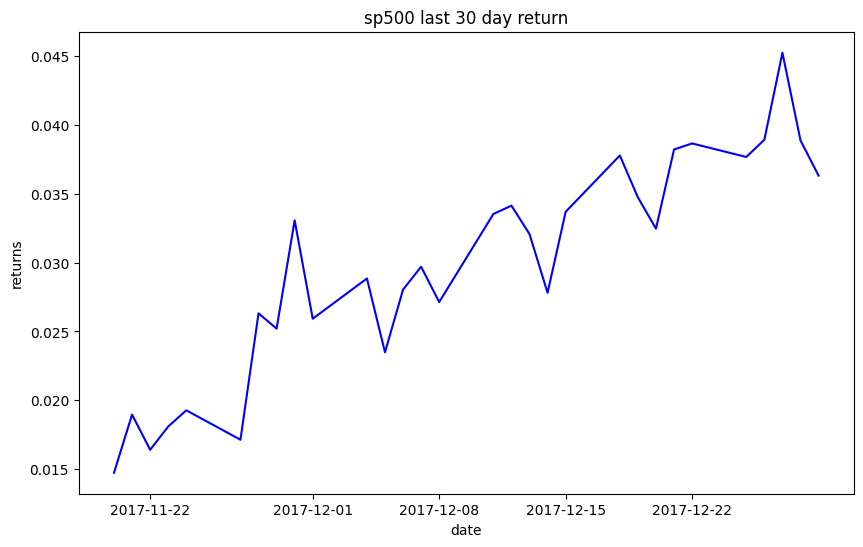

In [39]:
## Extracting 3 (Add code below)

# name:last 30 days return
# description: calculates the last 30-day returns for the SP500

def last30DayReturns(df, column_name):
    returns_30days = df[column_name].pct_change().rolling(window=30).sum()
    df[f"{column_name}_last30DayReturns"] = returns_30days

    return df

X_train = last30DayReturns(X_train, "SP500")
X_test = last30DayReturns(X_test, "SP500")
#only take the last 30 days
X_train_last_30_days = X_train.iloc[-30:]

# Plot the last 30-day returns for the "SP500" column
plt.figure(figsize=(10, 6))
plt.plot(X_train_last_30_days.index, X_train_last_30_days["SP500_last30DayReturns"], color="blue")
plt.title("sp500 last 30 day return")
plt.xlabel("date")
plt.ylabel("returns")
plt.show()


## Deep Learning Binary Classification

* For the deep learning model you can perform new data preprocessing methods and new feature engineering that are better suited to neural networks. You can also use all or some of the features you developed above (most features work in deep learning models as long as they are normalized).
* It is very hard to predict the stock price, so in my grading I will look more at the quality of the model you process (e.g., that there is no data leakage, that you performed some hyperparameter tuning).
* Make sure that you switch your GPU on, you have access to it on Colab. The training stage also takes long, you might want to use a smaller amount of data, or fewer epochs at first to speed up your development process.
* After your training is done, you don't have to save your model, but you do have to print the performance of your model. You can report two metrics the ROC(AUC) and the Accuracy against the test set.
* Also remember to set the random seed (random state) so that when I run your software, I get similar results (the results doesn't have to be exactely the same).
* You can choose any type of deep learning archetecture, e.g., LSTM, GRU, CNN, it is up to you.
* Remember that this section is less that 25% of the grade, so don't waste your time here.
* And lastly, remember this is the stock market, so it is **difficult** to have an accuracy above 50%, good luck!

In [82]:
#setting the random seed
np.random.seed(42)
set_seed(42)

#previous data processing
raw_prices = pd.read_csv("https://storage.googleapis.com/sovai-public/random/assetalloc.csv", sep=';', parse_dates=True, index_col='Dates', dayfirst=True)
df = raw_prices.sort_values(by='Dates')

#binary target variable based on the percentage change in FTSE values
df["target"] = np.where(df["FTSE"].pct_change().shift(-1) > 0, 1, 0)

#fillmissing values
df = df.fillna(method='ffill')
df["FTSE"] = np.log1p(df["FTSE"])
#previous means function
df = rollingMeanLastQuarter(df, "FTSE")

#features for x, target var for y
X = df.drop("target", axis=1)
y = df["target"]

#split into training/testing. 80% for training and 20 for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
#apply scaler to testing set
X_test_scaled = scaler.transform(X_test)
#NAN calculations
X_train_scaled = np.nan_to_num(X_train_scaled)
X_test_scaled = np.nan_to_num(X_test_scaled)

#resehpaing the training set for set up NN
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [90]:
#sequantial model - linear stack of layers
model = Sequential()
#1D convolutional layer with 16 filters
#a kernel size of 3
#ReLU activation
model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
#layer to vector
model.add(Flatten())
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.5))
#adding the output layer with a neuron and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))
#reference: https://www.tensorflow.org/api_docs/python/tf/keras/metrics/binary_crossentropy
#adam(learningrate) - https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
#train the model 5 times
model.fit(X_train_reshaped, y_train, epochs=5, batch_size=32, verbose=1)
#predict probabilities
y_pred_proba = model.predict(X_test_reshaped)
y_pred = (y_pred_proba > 0.5).astype(int)

#calculate the roc/auc score
rocAUC = roc_auc_score(y_test, y_pred_proba)
#calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"score for roc(auc): {rocAUC:.4f}")
print(f"score for accuracy: {accuracy:.4f}")


Epoch 1/5
193/193 [==============================] - 2s 4ms/step - loss: 0.6960 - accuracy: 0.5055
Epoch 2/5
193/193 [==============================] - 1s 4ms/step - loss: 0.6935 - accuracy: 0.4928
Epoch 3/5
193/193 [==============================] - 1s 4ms/step - loss: 0.6933 - accuracy: 0.4970
Epoch 4/5
193/193 [==============================] - 1s 5ms/step - loss: 0.6937 - accuracy: 0.5046
Epoch 5/5
49/49 [==============================] - 0s 3ms/step
score for roc(auc): 0.5129
score for accuracy: 0.4854


Here I performed a Convolutional Neural Network implemented using the Keras library with a Sequential architecture. this model gave me the best accurary rate whilst using an Adam Optimizer and a binary crossentrophy loss function as the evaluation metric.
The output shows the models ROC(AUC) score of 0.5129 suggests it's only slightly better than randomly guessing and it's limited ability to distinguish between the two classes. The accuracy score of 0.4854 means that around 48.54% of the model's predictions on the testing data were correct.

In [ ]:
T